<a href="https://colab.research.google.com/github/tnleang/machineLearning/blob/master/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Into to TensorFlow

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

# import tensorflow
import tensorflow as tf

In [0]:
# load the MNIST data
mnist = tf.keras.datasets.mnist

# convert data into floating-point
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/ 225.0, x_test / 255.0

In [0]:
# build a model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])



model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


In [0]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)

## Basic Classification

Classify images of clothing

install tensorflow 2.0.0

In [0]:
!pip install tensorflow==2.0.0

In [0]:
# some import are done in the first code cell

# import keras
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.15.0-rc3


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

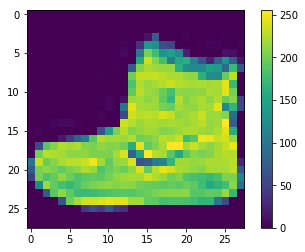

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
# converting to floating-point
train_images, test_images = train_images / 225.0, test_images / 255.0

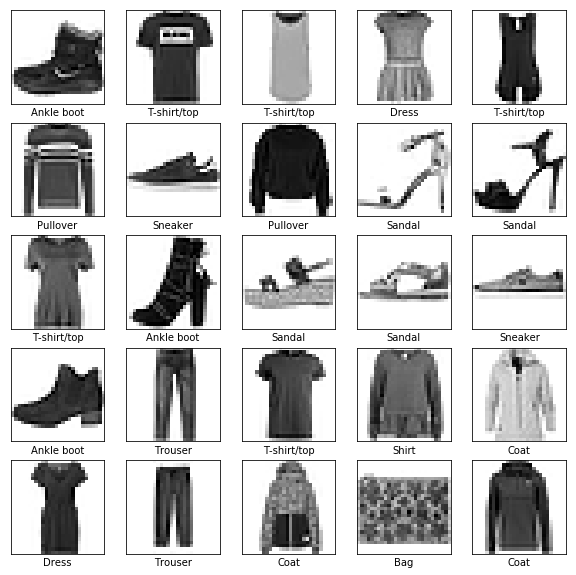

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
# Training the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [0]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 73us/sample - loss: 1.0277 - acc: 0.6785
Epoch 2/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.6124 - acc: 0.7794
Epoch 3/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.5424 - acc: 0.8069
Epoch 4/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.5034 - acc: 0.8233
Epoch 5/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.4788 - acc: 0.8318
Epoch 6/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.4604 - acc: 0.8379
Epoch 7/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.4470 - acc: 0.8427
Epoch 8/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.4360 - acc: 0.8464
Epoch 9/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.4268 - acc: 0.8494
Epoch 10/10
60000/60000 [==============================] - 

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('Test accuracy: ', test_acc)

10000/10000 - 0s - loss: 0.5045 - acc: 0.8190
Test accuracy:  0.819


In [0]:
predictions = model.predict(test_images)

In [0]:
predictions[0]

array([6.9627508e-06, 6.4510812e-07, 3.3091521e-05, 4.0214865e-05,
       2.7790857e-05, 4.1670507e-01, 8.2446801e-05, 4.0030372e-01,
       8.0895154e-03, 1.7471054e-01], dtype=float32)

In [0]:
np.argmax(predictions[1])

2

In [0]:
test_labels[1]

2

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'white'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10), color='white')
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

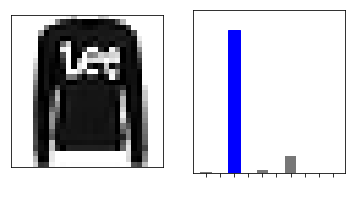

In [0]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

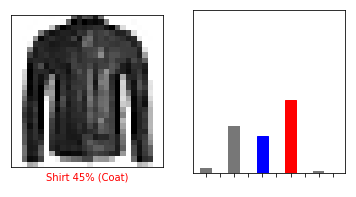

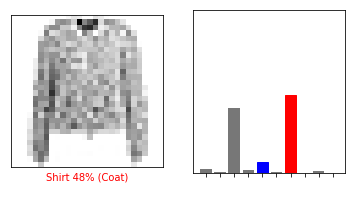

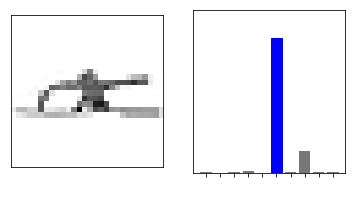

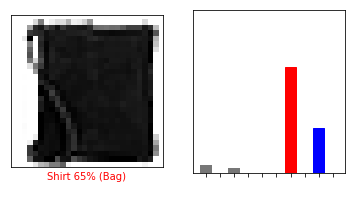

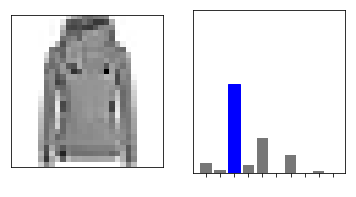

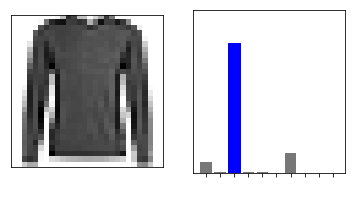

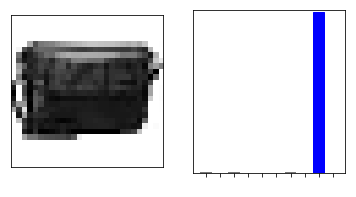

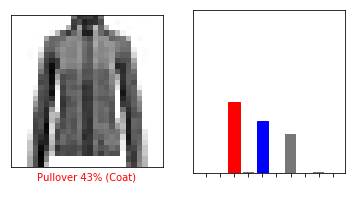

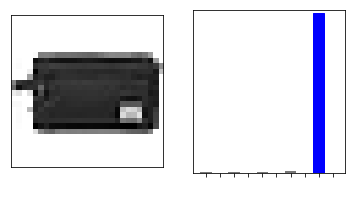

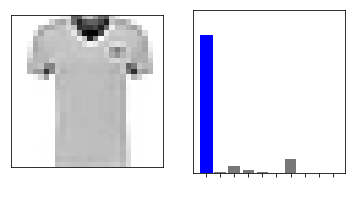

In [0]:
for i in range(50,60):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()